In [108]:
from Perceptron import Perceptron

import numpy as np
import matplotlib.pyplot as plt

In [109]:
X_train = np.load('datasets_np/db1/X_train.npy')
y_train = np.load('datasets_np/db1/y_train.npy')

X_test = np.load('datasets_np/db1/X_test.npy')
y_test = np.load('datasets_np/db1/y_test.npy')

In [110]:
xrow_train, xcol_train = X_train.shape
xrow_test, xcol_test = X_test.shape
ratio = xrow_test/(xrow_train+xrow_test)
print(f'shape_train: {xrow_train, xcol_train}\nshape_test: {xrow_test, xcol_test}\nratio: {ratio}')

shape_train: (124, 13)
shape_test: (54, 13)
ratio: 0.30337078651685395


In [111]:
def run_model(X_train, y_train, X_test, y_test, n_iters=1000):
    global p
    p = Perceptron(n_iters=n_iters)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    print(f'acurácia: {p.score_acc(y_test, y_pred)}')

run_model(X_train, y_train, X_test, y_test)

acurácia: 0.6481481481481481


In [112]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

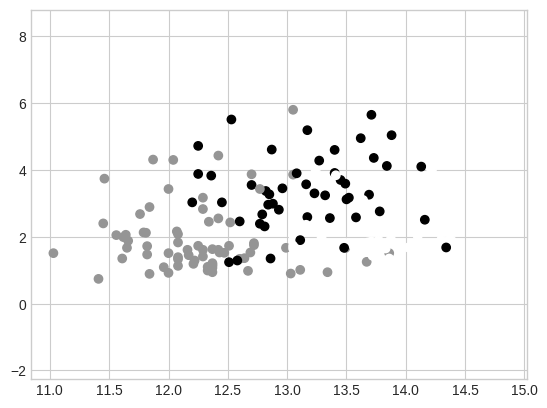

In [113]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

2. _Perform some linear data transformation that you believe might cause an improvement in the classification's training and testing performances._

_Approach: Feature Scaling with reduction of iterations_

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
StandardScaler().fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
run_model(X_train, y_train, X_test, y_test, 500)

acurácia: 0.7222222222222222
